In [38]:
import pandas as pd
import numpy as np

# Data Visualisation Libraries
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# !pip install seaborn --upgrade
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVR
from xgboost import XGBClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# from sklearn.linear_model import LogisticRegression

In [39]:
df = pd.read_csv('ObesityDataSet_raw_data.csv')

# print('✔️ Dataset Imported Successfully!\n')
print('It contains {} rows and {} columns.'.format(df.shape[0], df.shape[1]))
df

It contains 2111 rows and 17 columns.


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [44]:
le = preprocessing.LabelEncoder()
df = df[['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE',
         'SCC','CALC','MTRANS','NObeyesdad']].apply(le.fit_transform)

NameError: name 'preprocessing' is not defined

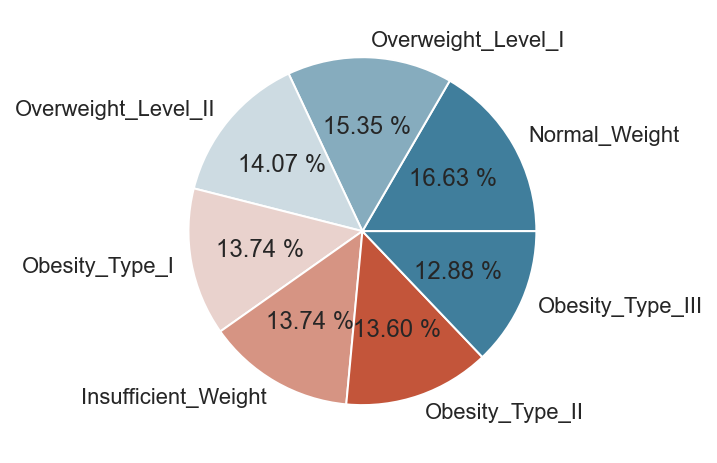

In [4]:
sns.set()
df['NObeyesdad'].value_counts()
colors = sns.diverging_palette(230, 20)

plt.pie(df['NObeyesdad'].value_counts(),labels = ['Normal_Weight','Overweight_Level_I','Overweight_Level_II',
                                             'Obesity_Type_I','Insufficient_Weight','Obesity_Type_II',
                                            'Obesity_Type_III'],colors = colors,autopct  = '%.2f %%',)
plt.show()

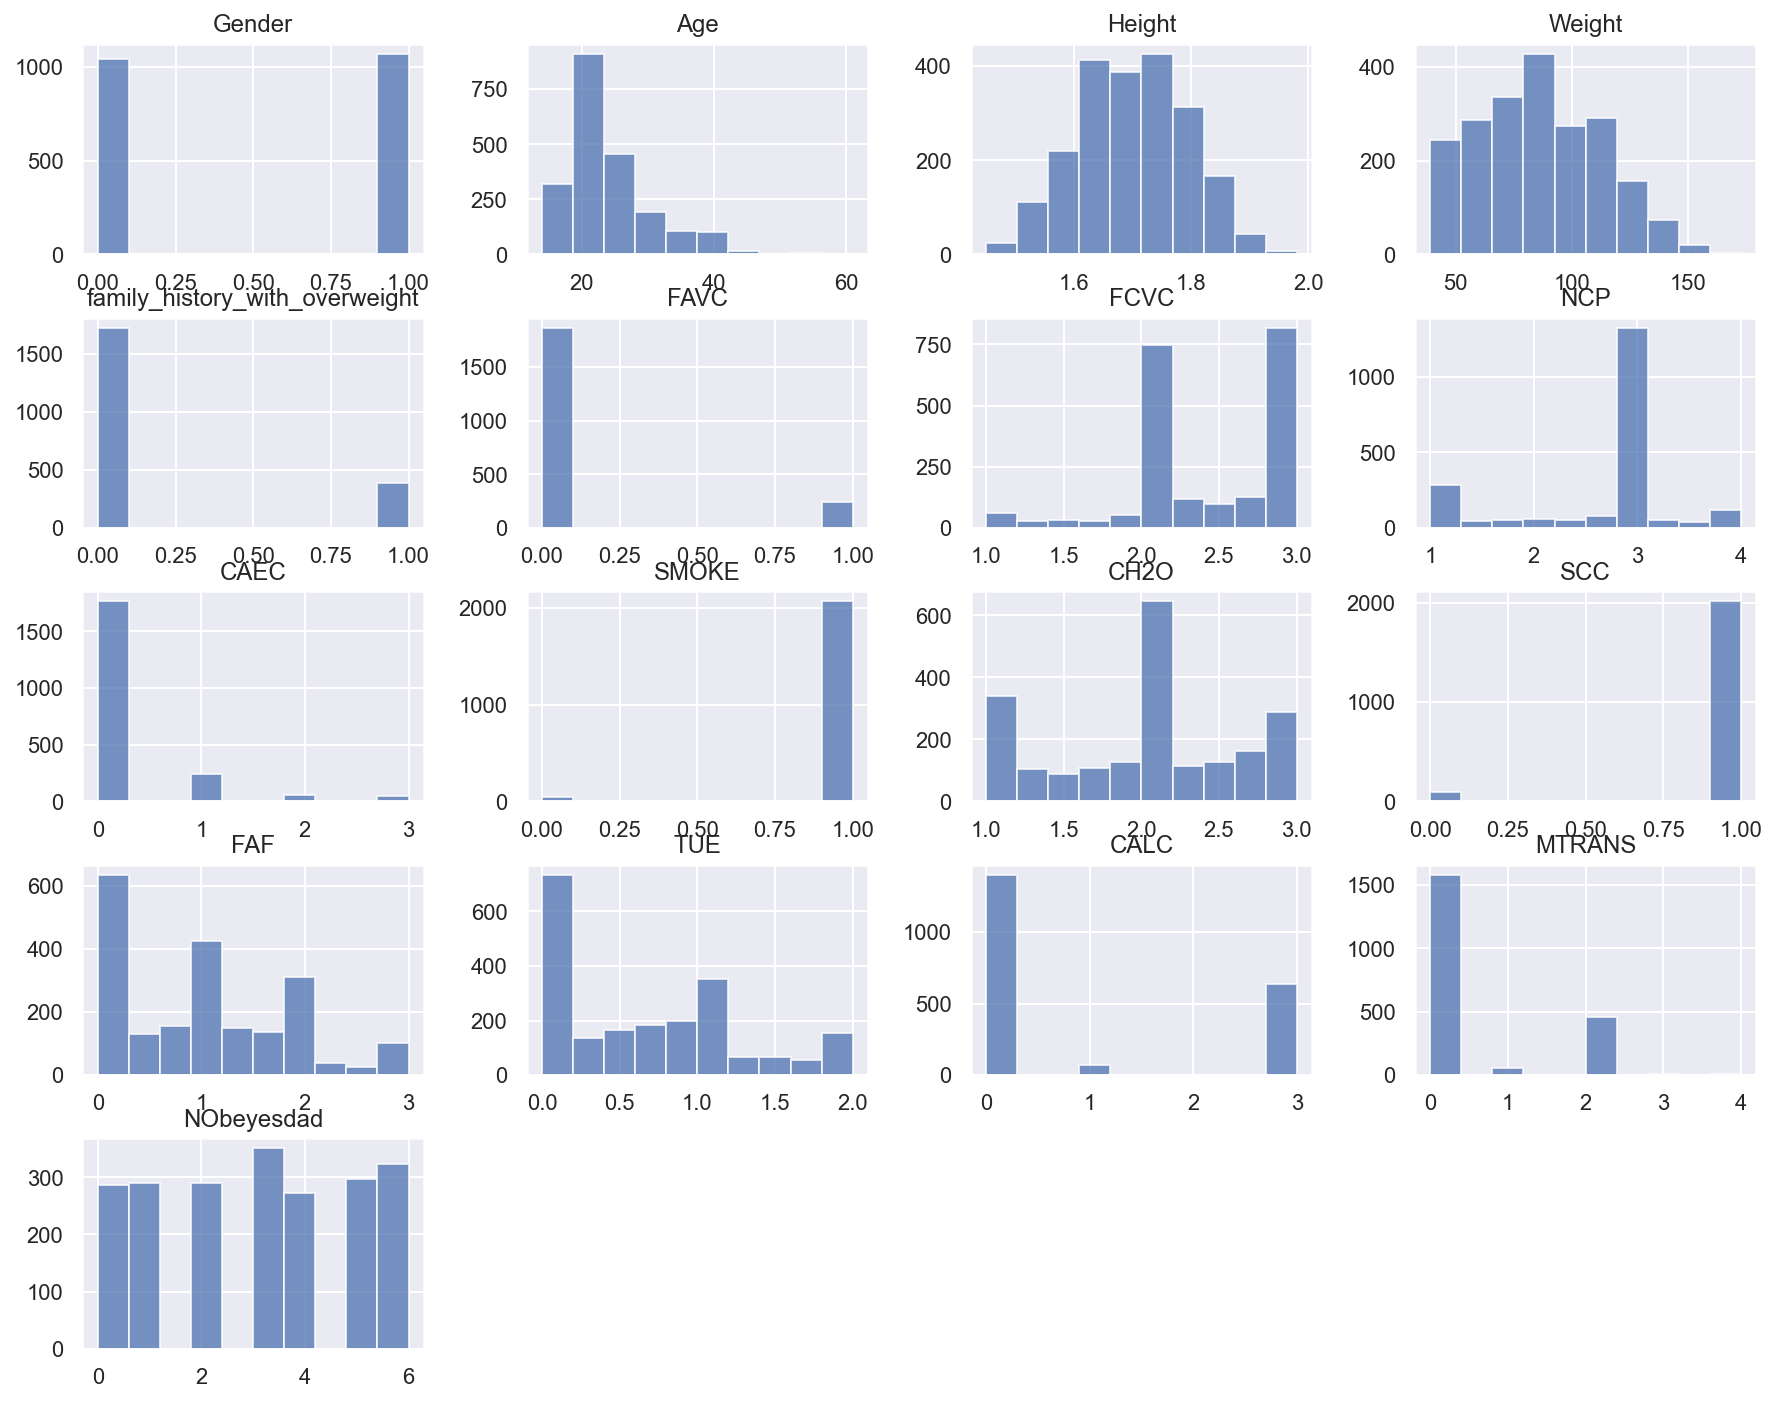

In [5]:
sns.set()
df.hist(figsize=(15,12),alpha=0.75)
plt.title('Features Distribution')
plt.show()

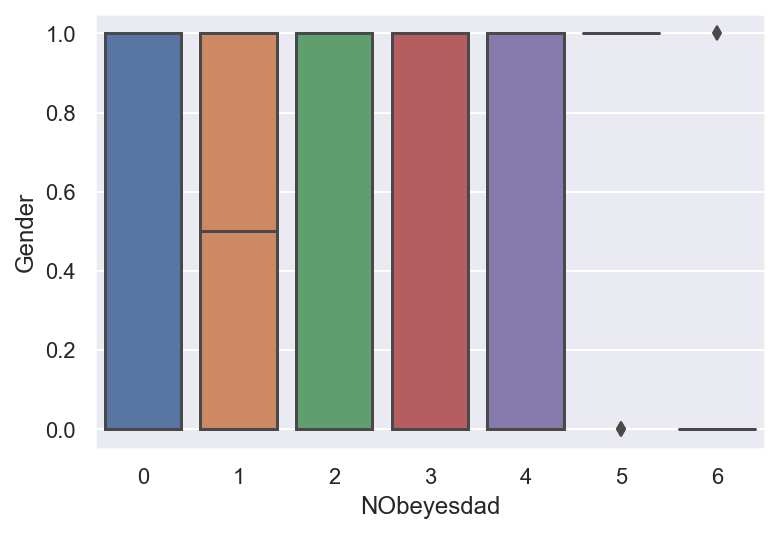

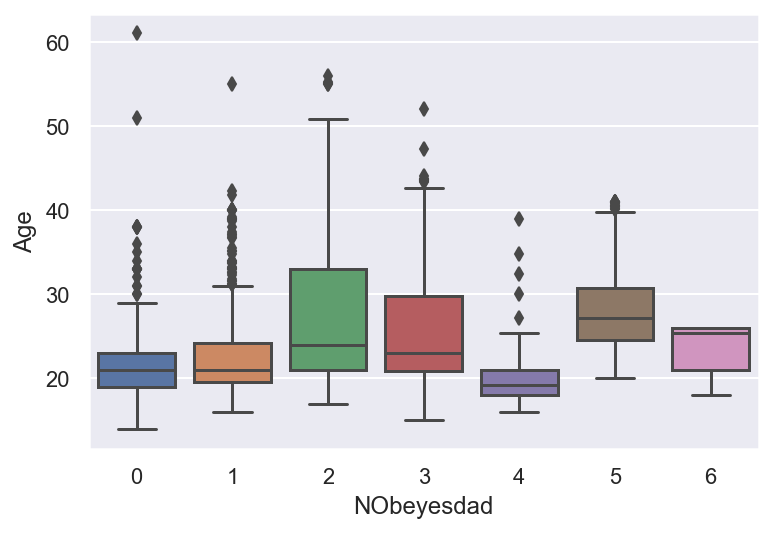

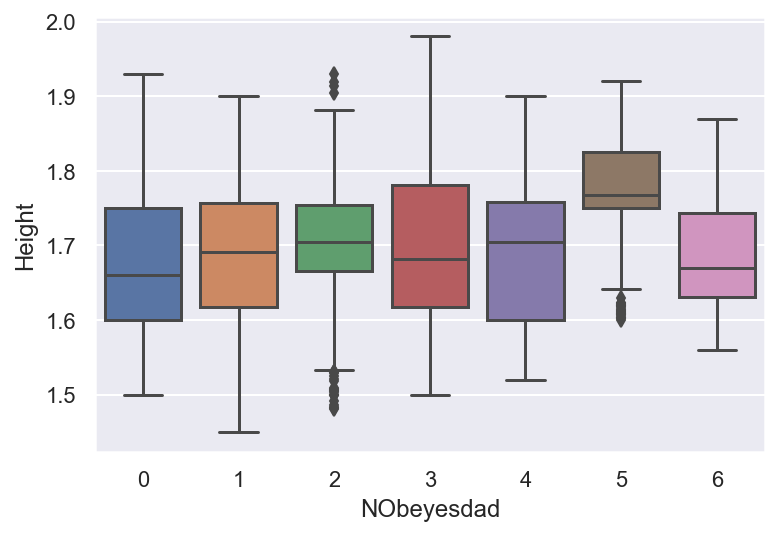

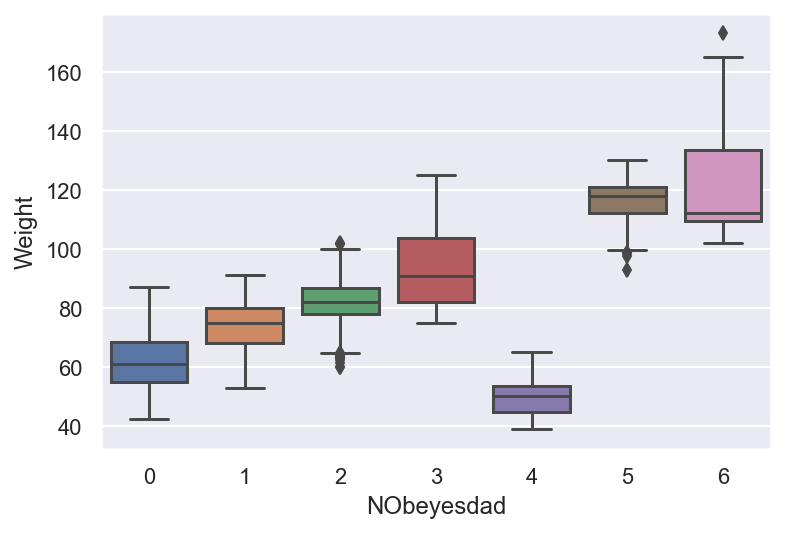

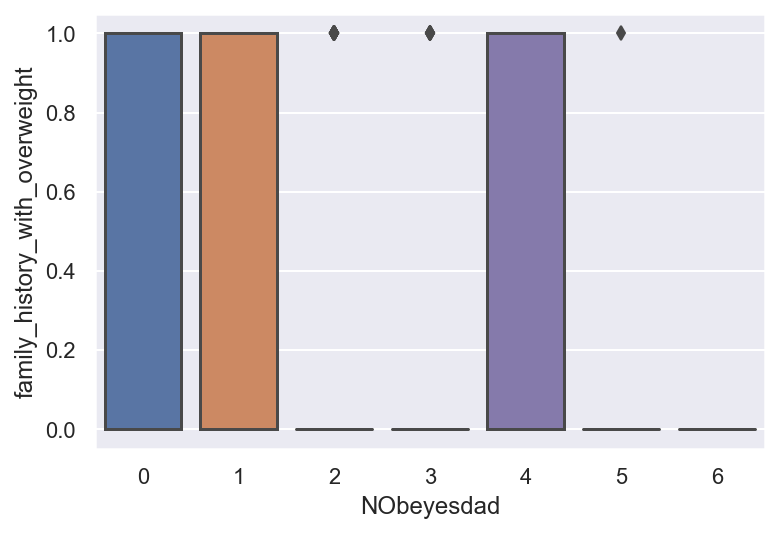

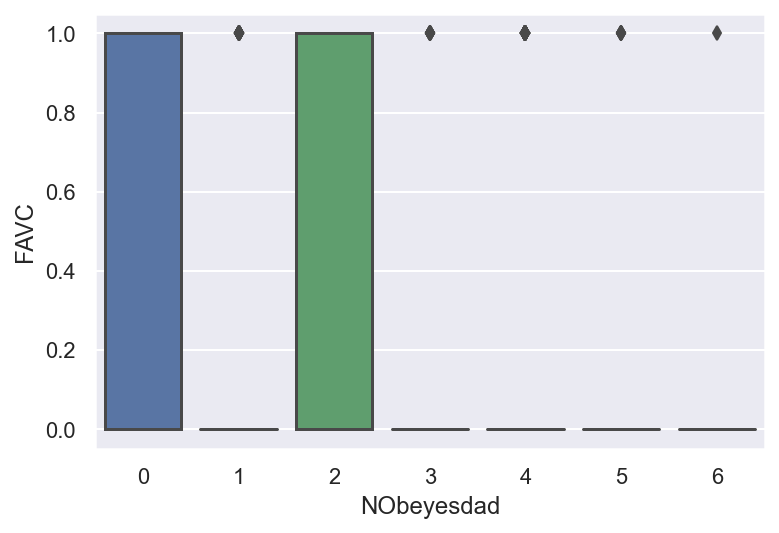

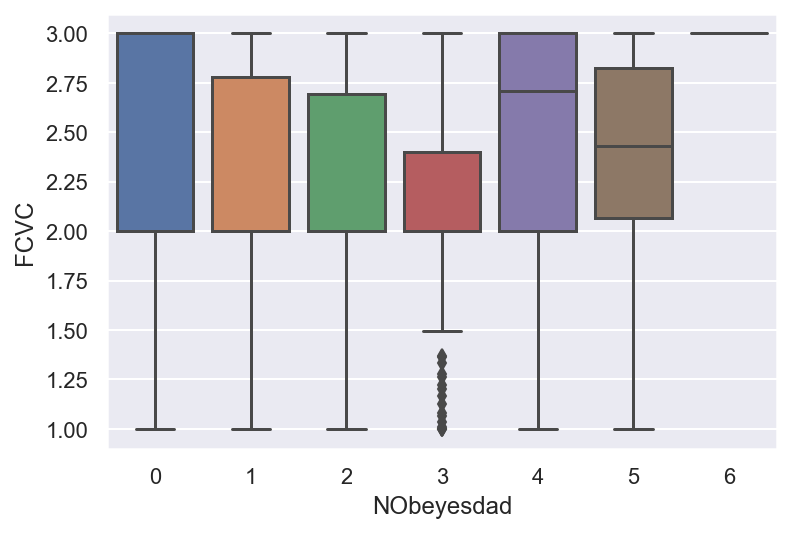

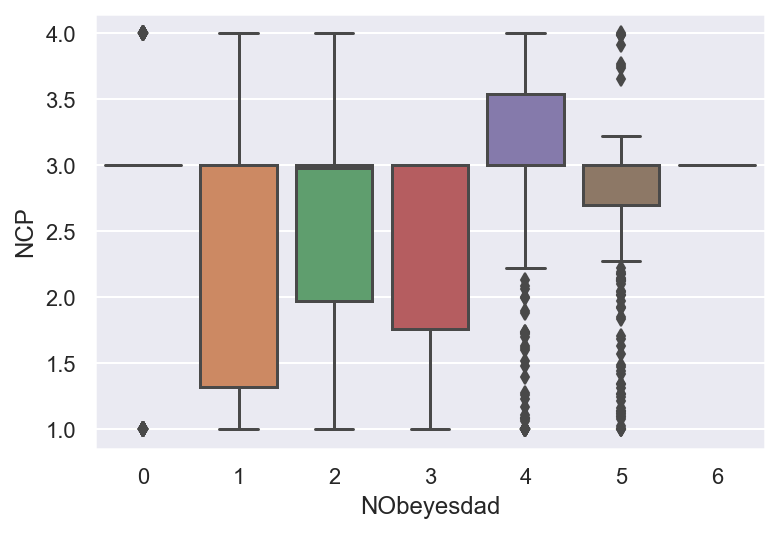

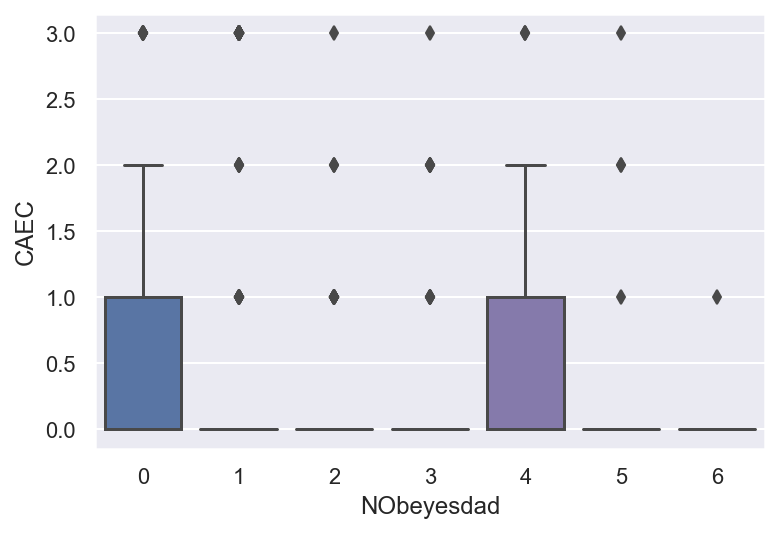

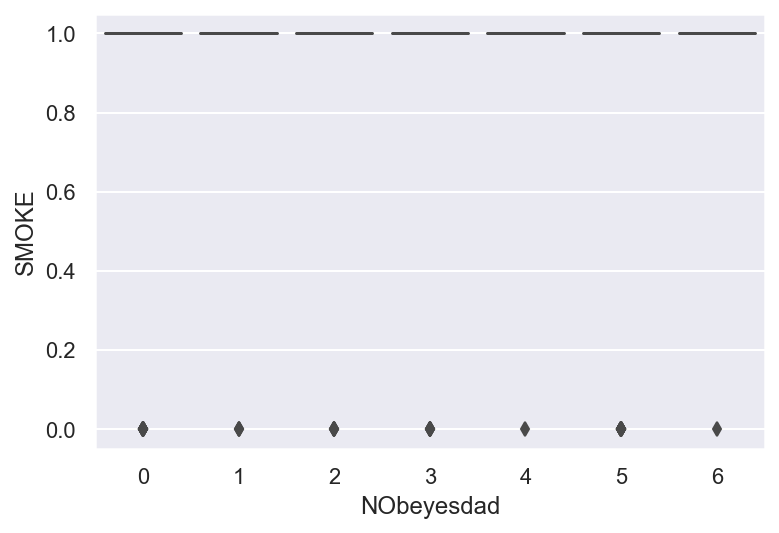

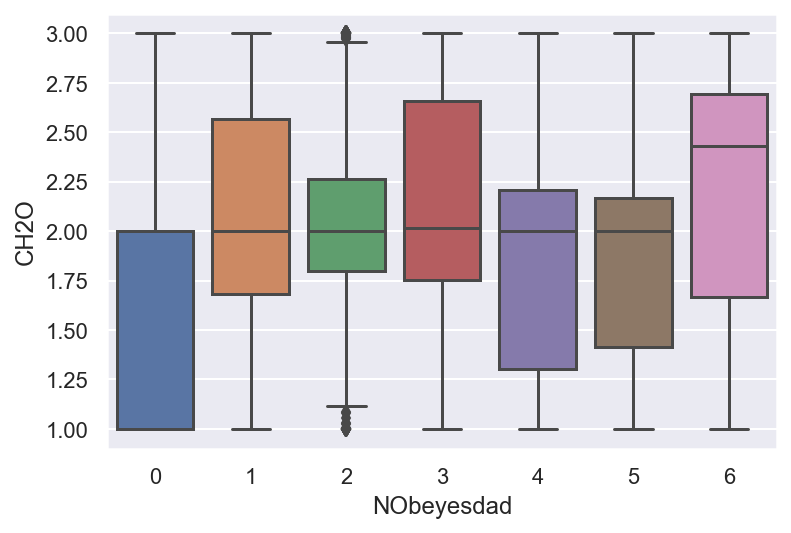

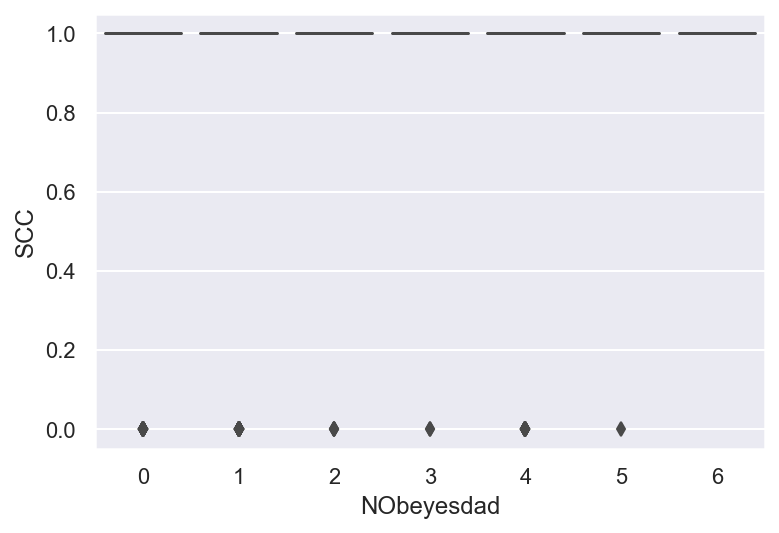

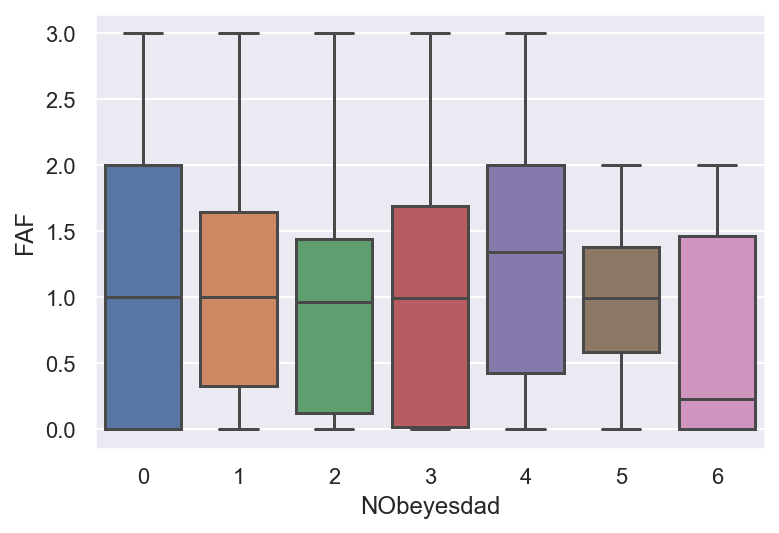

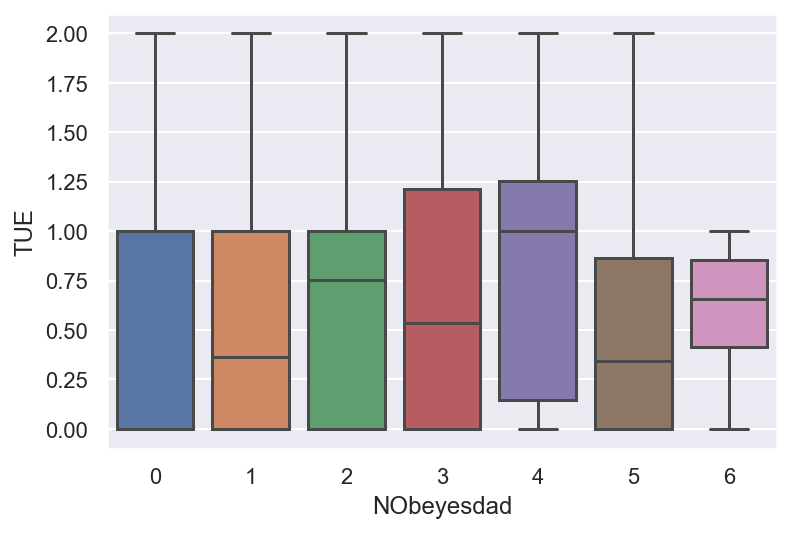

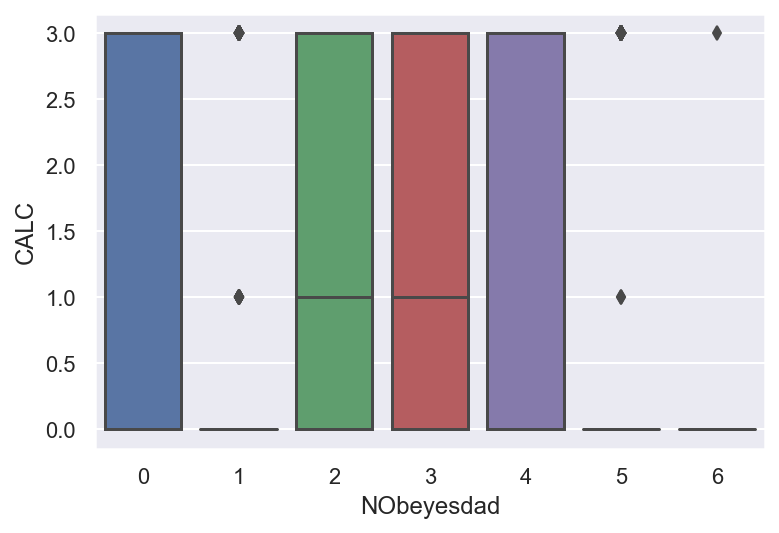

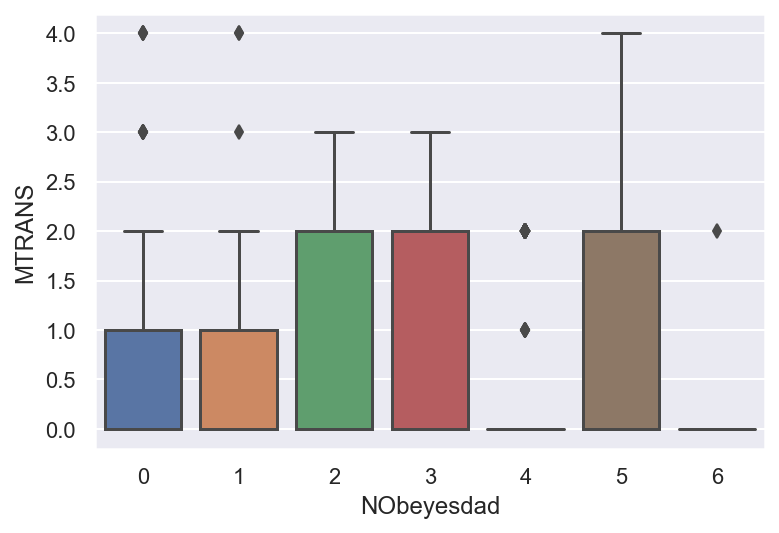

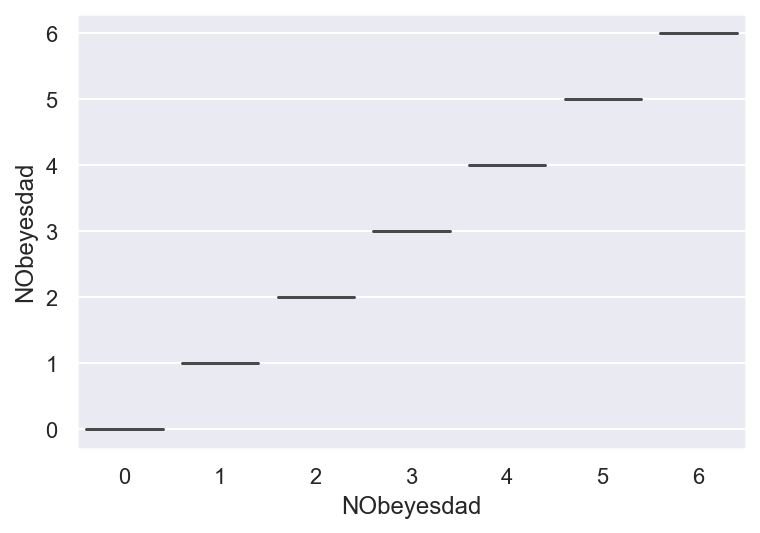

In [6]:
for i in range(0, len(df.columns)):
    sns.boxplot(x=df['NObeyesdad'],y=df.iloc[:,i], data=df)
    colname=df.columns[i]
    plt.ylabel(colname)
    plt.xlabel('NObeyesdad')
    plt.show()
    

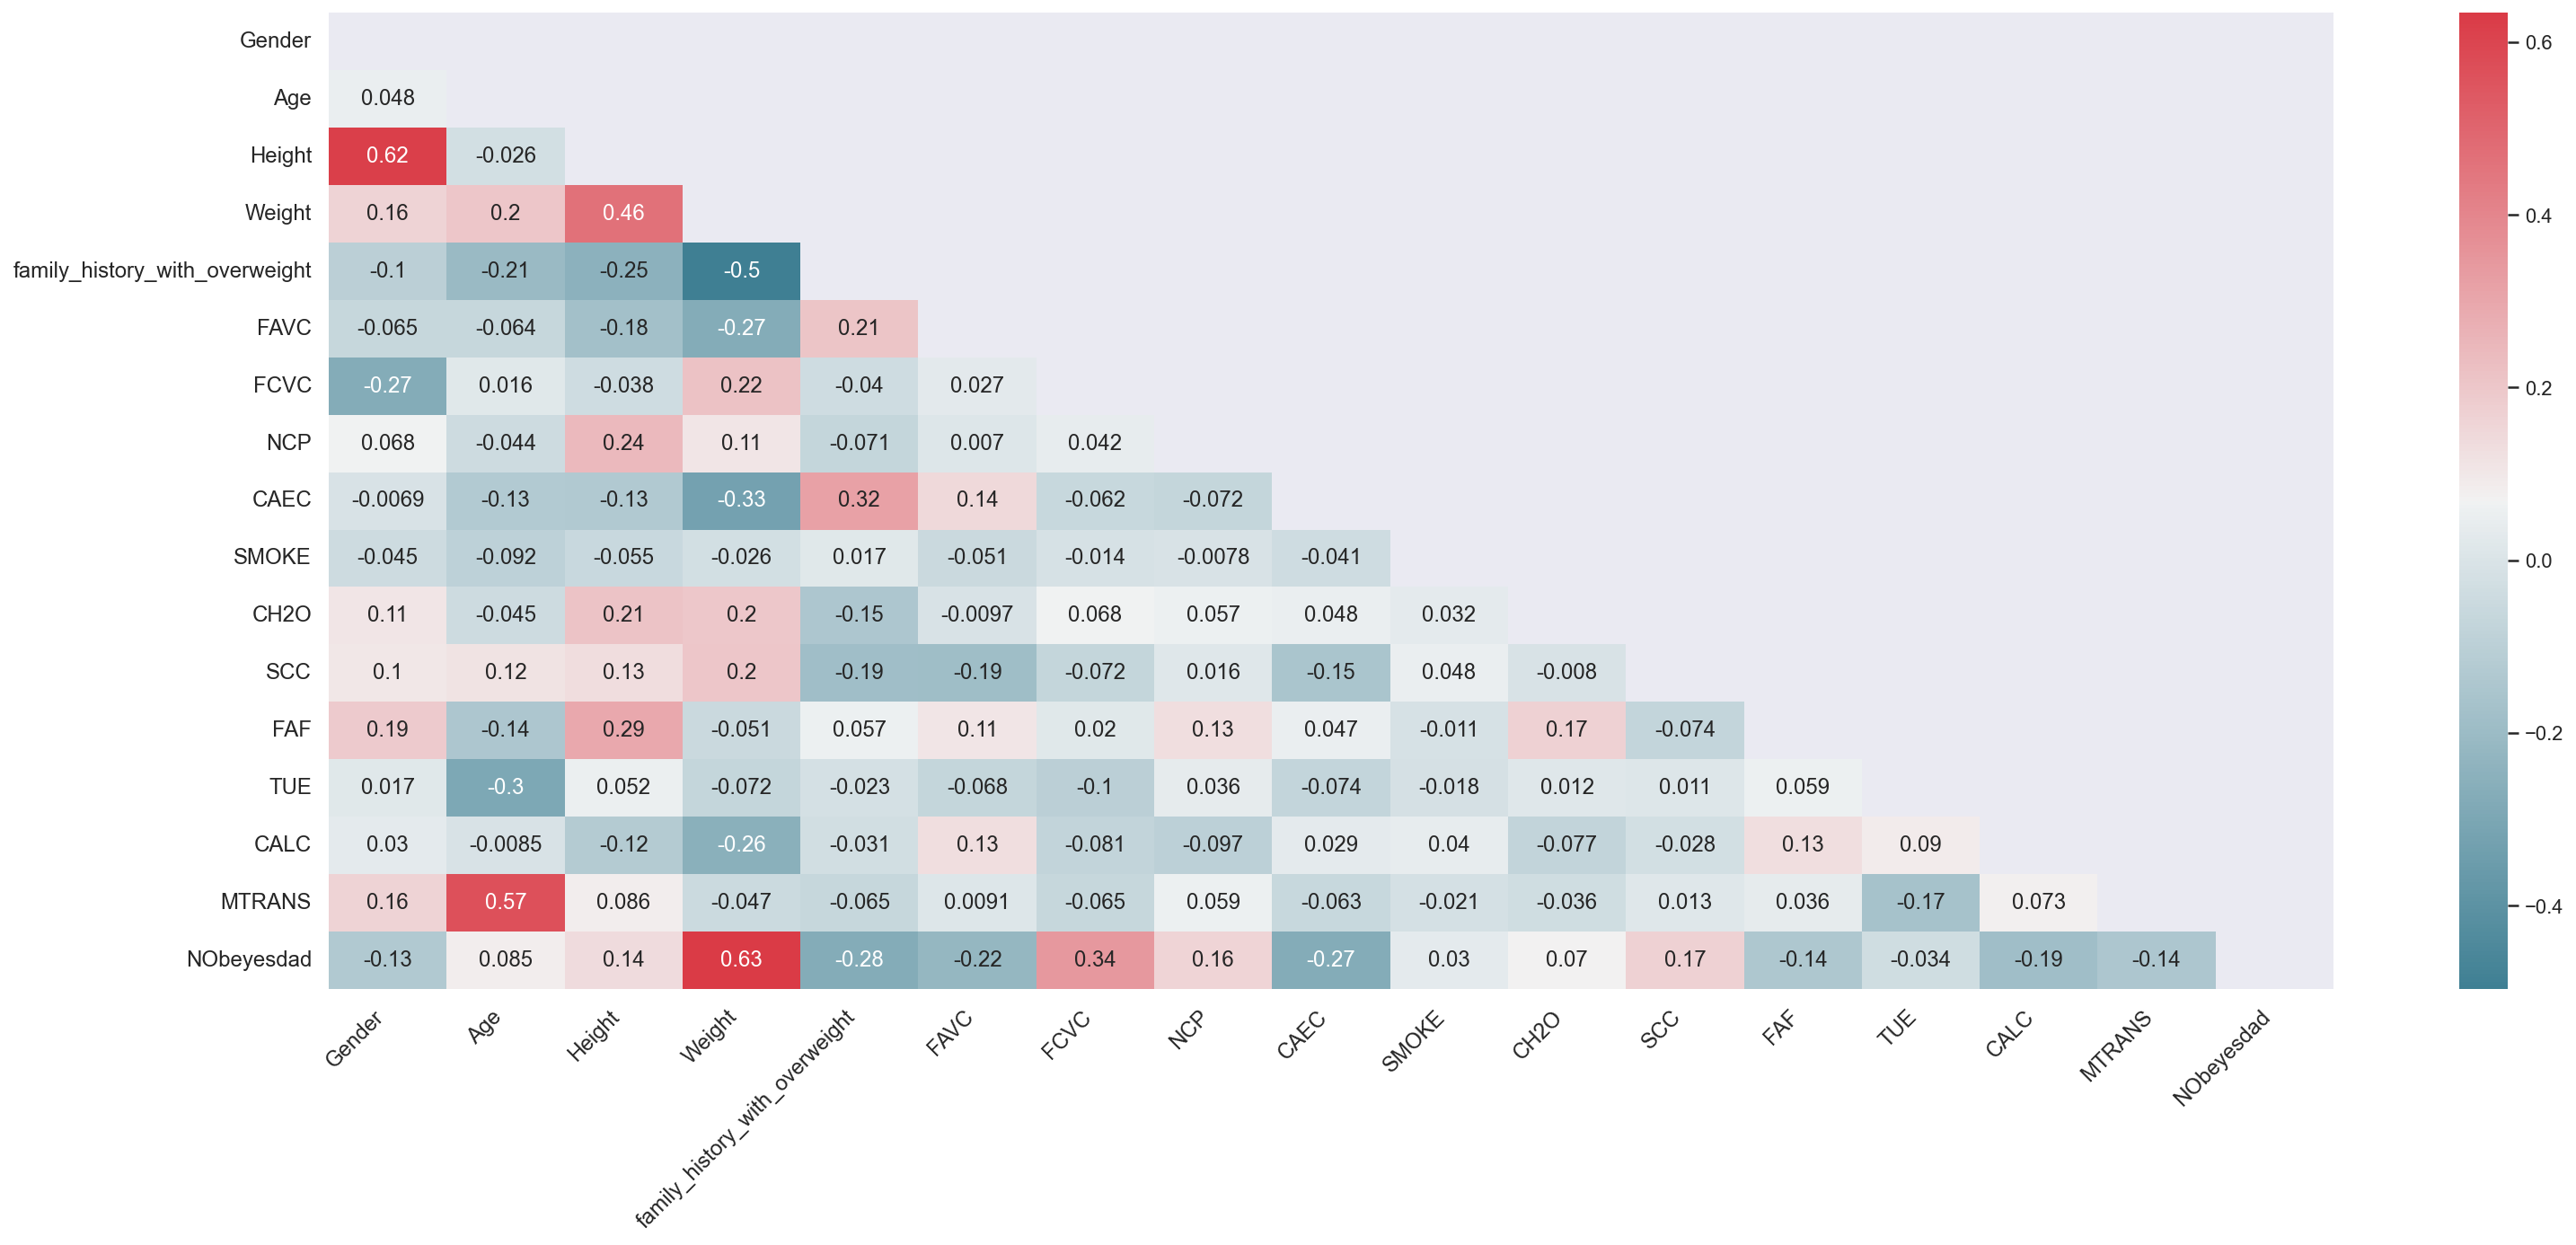

In [7]:
# Correlation between different variables
corr = df.corr()

# Matplotlib plot configuration
fig, ax = plt.subplots(figsize=(25, 10))


# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True,  cmap=cmap, mask=mask)

# Set up a layout
#X axis
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize=12
);
#Y axis
ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize=12
);

In [8]:
def plot_continuous(feature):
    '''Plot a histogram and boxplot for the churned and retained distributions for the specified feature.'''
    df_func = df.copy()
    df_func['NObeyesdad'] = df_func['NObeyesdad'].astype('category')

    fig, (ax1, ax2) = plt.subplots(2,
                                   figsize=(9, 7),
                                   sharex=True,
                                   gridspec_kw={'height_ratios': (.7, .3)})

    for df, color, label in zip([df_retained, df_churned], colors, ['Retained', 'Churned']):
        sns.histplot(data=df,
                     x=feature,
                     bins=15,
                     color=color,
                     alpha=0.66,
                     edgecolor='firebrick',
                     label=label,
                     kde=False,
                     ax=ax1)
    ax1.legend()

    sns.boxplot(x=feature, y='Exited', data=df_func, palette=colors, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_yticklabels(['Retained', 'Churned'])

    plt.tight_layout();

In [9]:
X=df.drop(['NObeyesdad'], axis=1)
y=df['NObeyesdad']

In [10]:
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=42)

In [11]:
# Trying decision tree
from sklearn.tree import DecisionTreeClassifier

In [12]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)
mse_clf = mean_squared_error(y_test, y_pred_clf)
print("RMSE using LASSO: ", np.sqrt(mse_clf))
print("LASSO R2 score :", r2_score(y_test,y_pred_clf))

RMSE using LASSO:  0.7084447327730932
LASSO R2 score : 0.8754415451230628


In [13]:
# X=affecting_conditions.values
# y=target_result.values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = random_state)

In [14]:
lm_lasso=Lasso()
lm_lasso.fit(X_train,y_train)
y_pred_lm_lasso = lm_lasso.predict(X_test)
mse_lm_lasso = mean_squared_error(y_test, y_pred_lm_lasso)
print("RMSE using LASSO: ", np.sqrt(mse_lm_lasso))
print("LASSO R2 score :", r2_score(y_test,y_pred_lm_lasso))

RMSE using LASSO:  1.552222058660698
LASSO R2 score : 0.4020443653557838


In [15]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("RMSE using CLF: ", np.sqrt(mse_rf))
print("RF R2 score :", r2_score(y_test,y_pred_rf))

RMSE using CLF:  0.4605661864718383
RF R2 score : 0.9473564266180492


In [16]:
xgb = XGBClassifier() 
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test) 
mse_xgb = mean_squared_error(y_pred_xgb, y_test)
print("RMSE:" , np.sqrt(mse_xgb))
print("XGBoost R2 score :", r2_score(y_test,y_pred_xgb))

RMSE: 0.5470305514707787
XGBoost R2 score : 0.9257349589790337


In [17]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
print(model.coef_)

[-0.4833156  -0.01031453 -1.73145531  0.04891361  0.4098262  -0.41001357
  0.59609502  0.33244945 -0.21024519  0.24420371 -0.13791195  0.58608397
 -0.20295595  0.02639164  0.01502499 -0.1231224 ]


In [22]:
print(model.intercept_)

-0.3381135384120362


In [23]:
pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])

,Coeff
Gender,-0.483316
Age,-0.010315
Height,-1.731455
Weight,0.048914
family_history_with_overweight,0.409826
FAVC,-0.410014
FCVC,0.596095
NCP,0.332449
CAEC,-0.210245
SMOKE,0.244204


In [24]:
predictions = model.predict(X_test)

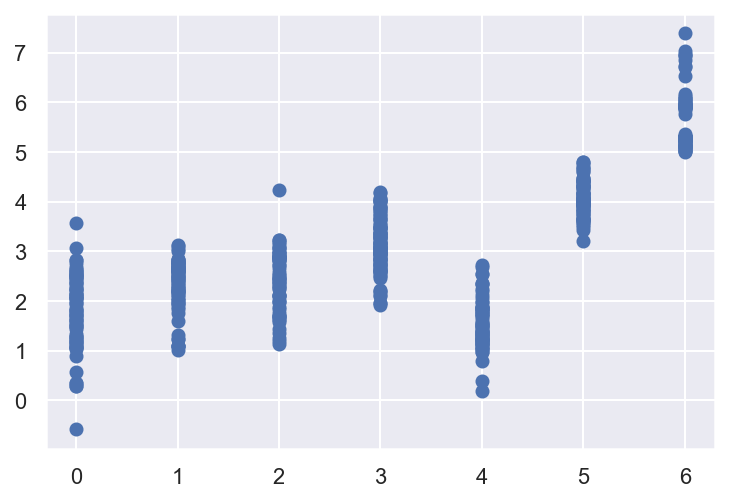

In [25]:
plt.scatter(y_test, predictions)

(array([  3.,  32.,  64.,  90., 105., 106.,  63.,  24.,  38.,   3.]),
 array([-3.56291609, -2.82511935, -2.08732261, -1.34952588, -0.61172914,
         0.1260676 ,  0.86386434,  1.60166108,  2.33945782,  3.07725455,
         3.81505129]),
 <BarContainer object of 10 artists>)

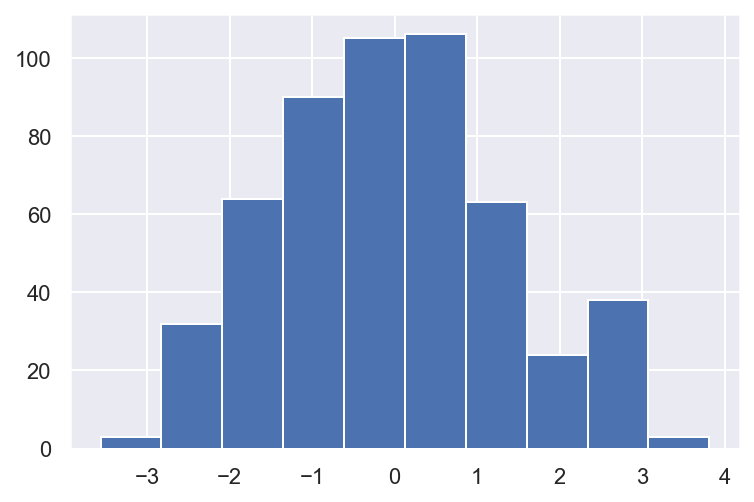

In [26]:
plt.hist(y_test - predictions)

In [27]:
from sklearn import metrics

In [28]:
metrics.mean_absolute_error(y_test, predictions)

1.1334947071413561

In [29]:
metrics.mean_squared_error(y_test, predictions)

1.9684564478128161

In [30]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.4030169093110803

In [31]:
linearmodel = XGBClassifier() 
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test) 
mse_xgb = mean_squared_error(y_pred_xgb, y_test)
print("RMSE:" , np.sqrt(mse_xgb))
print("XGBoost R2 score :", r2_score(y_test,y_pred_xgb))

RMSE: 0.5470305514707787
XGBoost R2 score : 0.9257349589790337


IndexError: index 2 is out of bounds for axis 0 with size 2

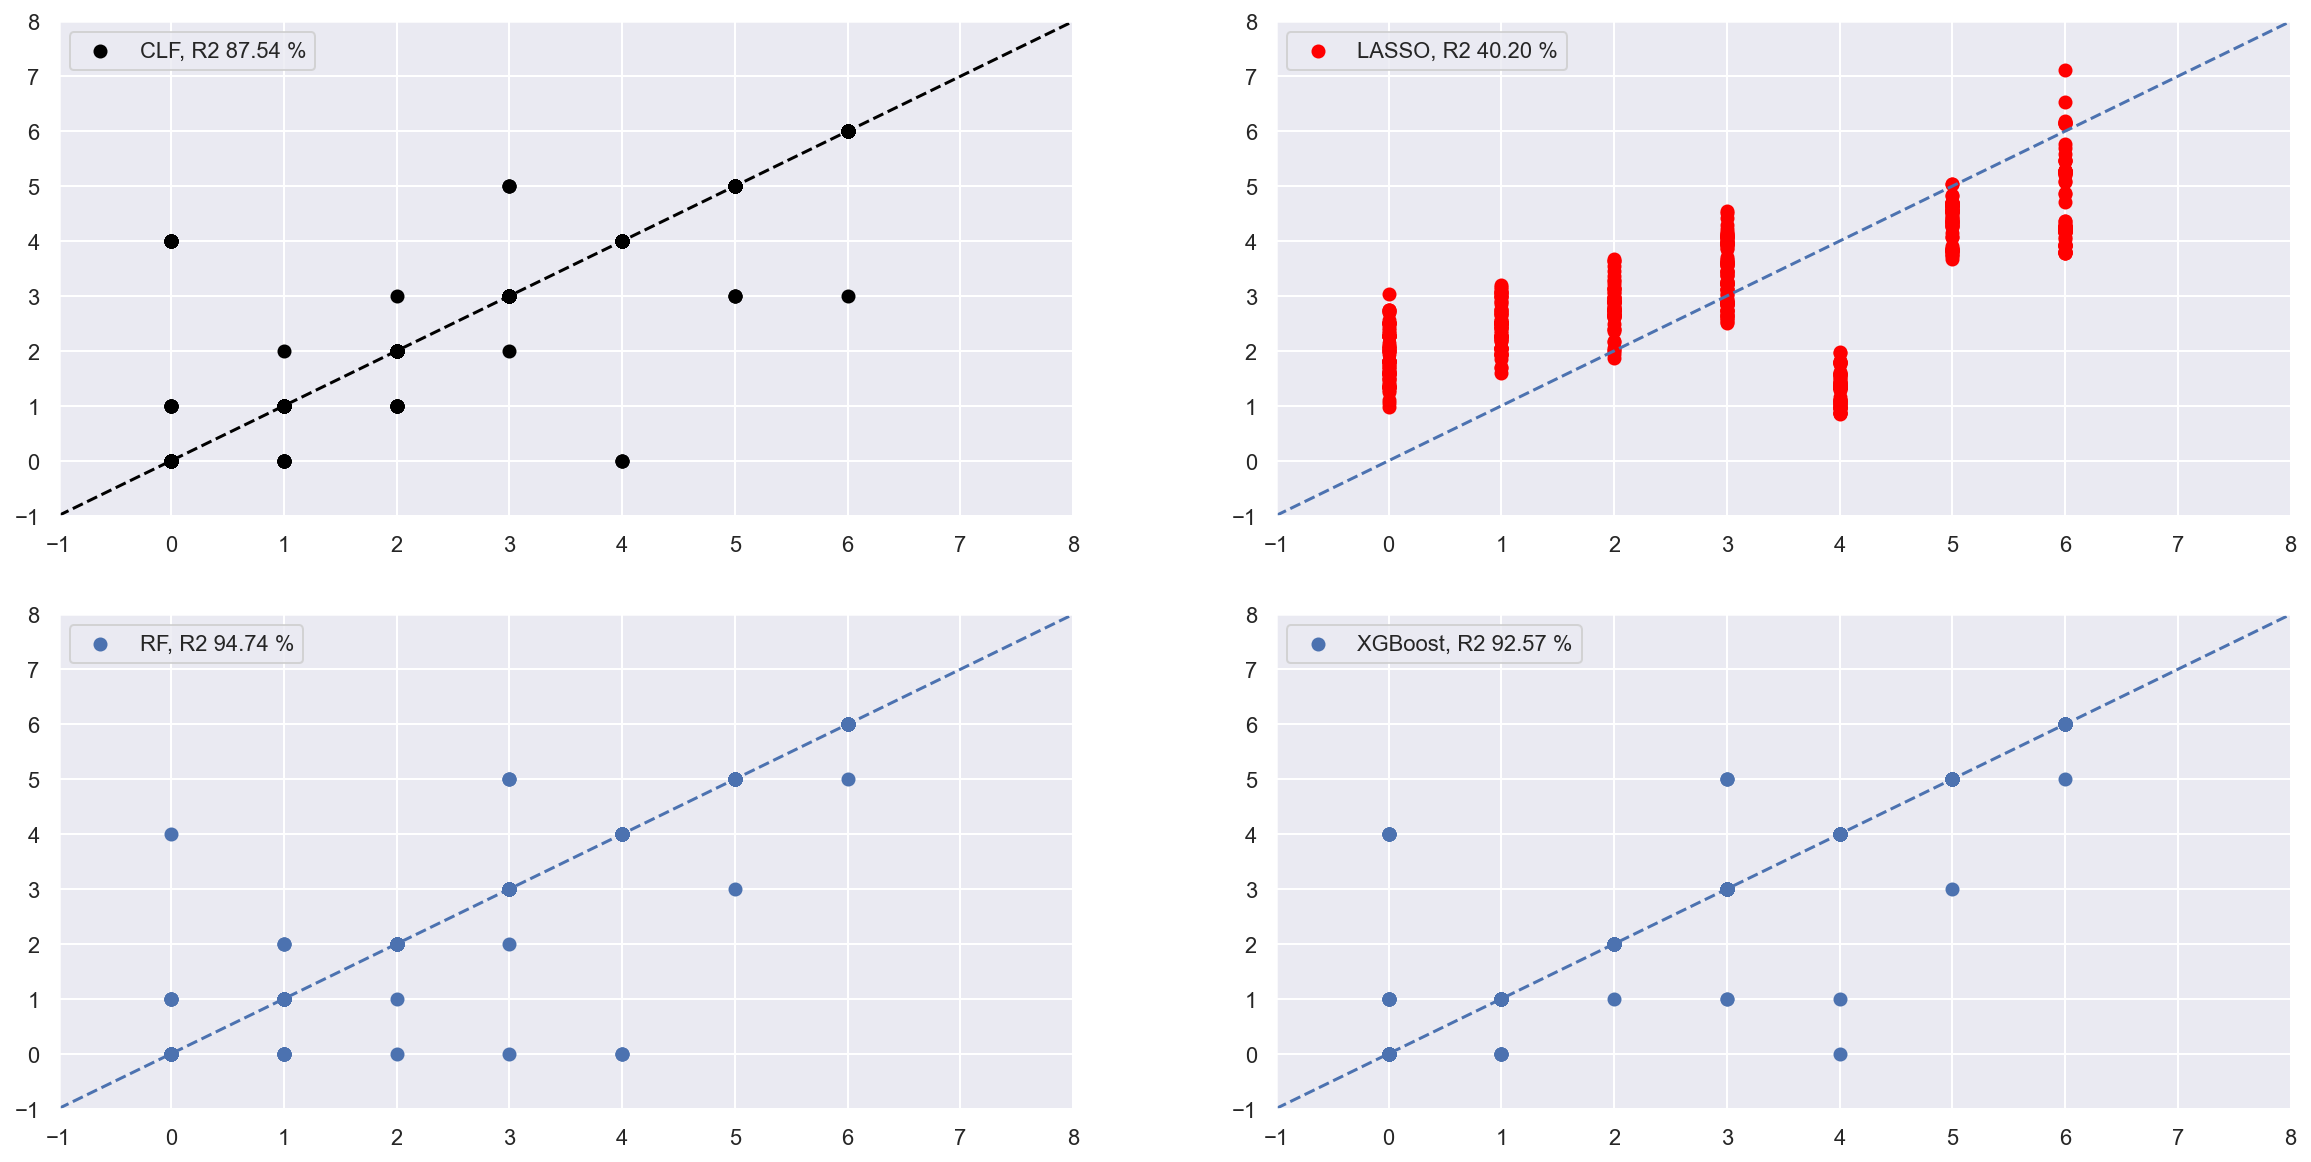

In [35]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.set()


ax[0,0].scatter(y_test, y_pred_clf, label='CLF, R2 {:.2f} %'.format(r2_score(y_test, y_pred_clf)*100), color='black')
ax[0,0].plot([-1, 8],[-1, 8],linestyle='--', color='black')
ax[0,0].axis([-1, 8, -1, 8])
ax[0,0].legend(loc='upper left');


ax[0,1].scatter(y_test, y_pred_lm_lasso, label='LASSO, R2 {:.2f} %'.format(r2_score(y_test, y_pred_lm_lasso)*100), color='red')
ax[0,1].plot([-1, 8],[-1, 8],linestyle='--')
ax[0,1].axis([-1, 8, -1, 8])
ax[0,1].legend(loc='upper left');

ax[1,0].scatter(y_test, y_pred_rf, label='RF, R2 {:.2f} %'.format(r2_score(y_test, y_pred_rf)*100))
ax[1,0].plot([-1, 8],[-1, 8],linestyle='--')
ax[1,0].axis([-1, 8, -1, 8])
ax[1,0].legend(loc='upper left');

ax[1,1].scatter(y_test, y_pred_xgb, label='XGBoost, R2 {:.2f} %'.format(r2_score(y_test, y_pred_xgb)*100))
ax[1,1].plot([-1, 8],[-1, 8],linestyle='--')
ax[1,1].axis([-1, 8, -1, 8])
ax[1,1].legend(loc='upper left');


ax[2,1].scatter(y_test, y_pred_xgb, label='XGBoost, R2 {:.2f} %'.format(r2_score(y_test, y_pred_xgb)*100))
ax[2,1].plot([-1, 8],[-1, 8],linestyle='--')
ax[2,1].axis([-1, 8, -1, 8])
ax[2,1].legend(loc='upper left');


plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
# plt.title('Obesity Regression by ML models')
# plt.legend(loc='cente');
plt.show()

In [33]:
b=X.columns

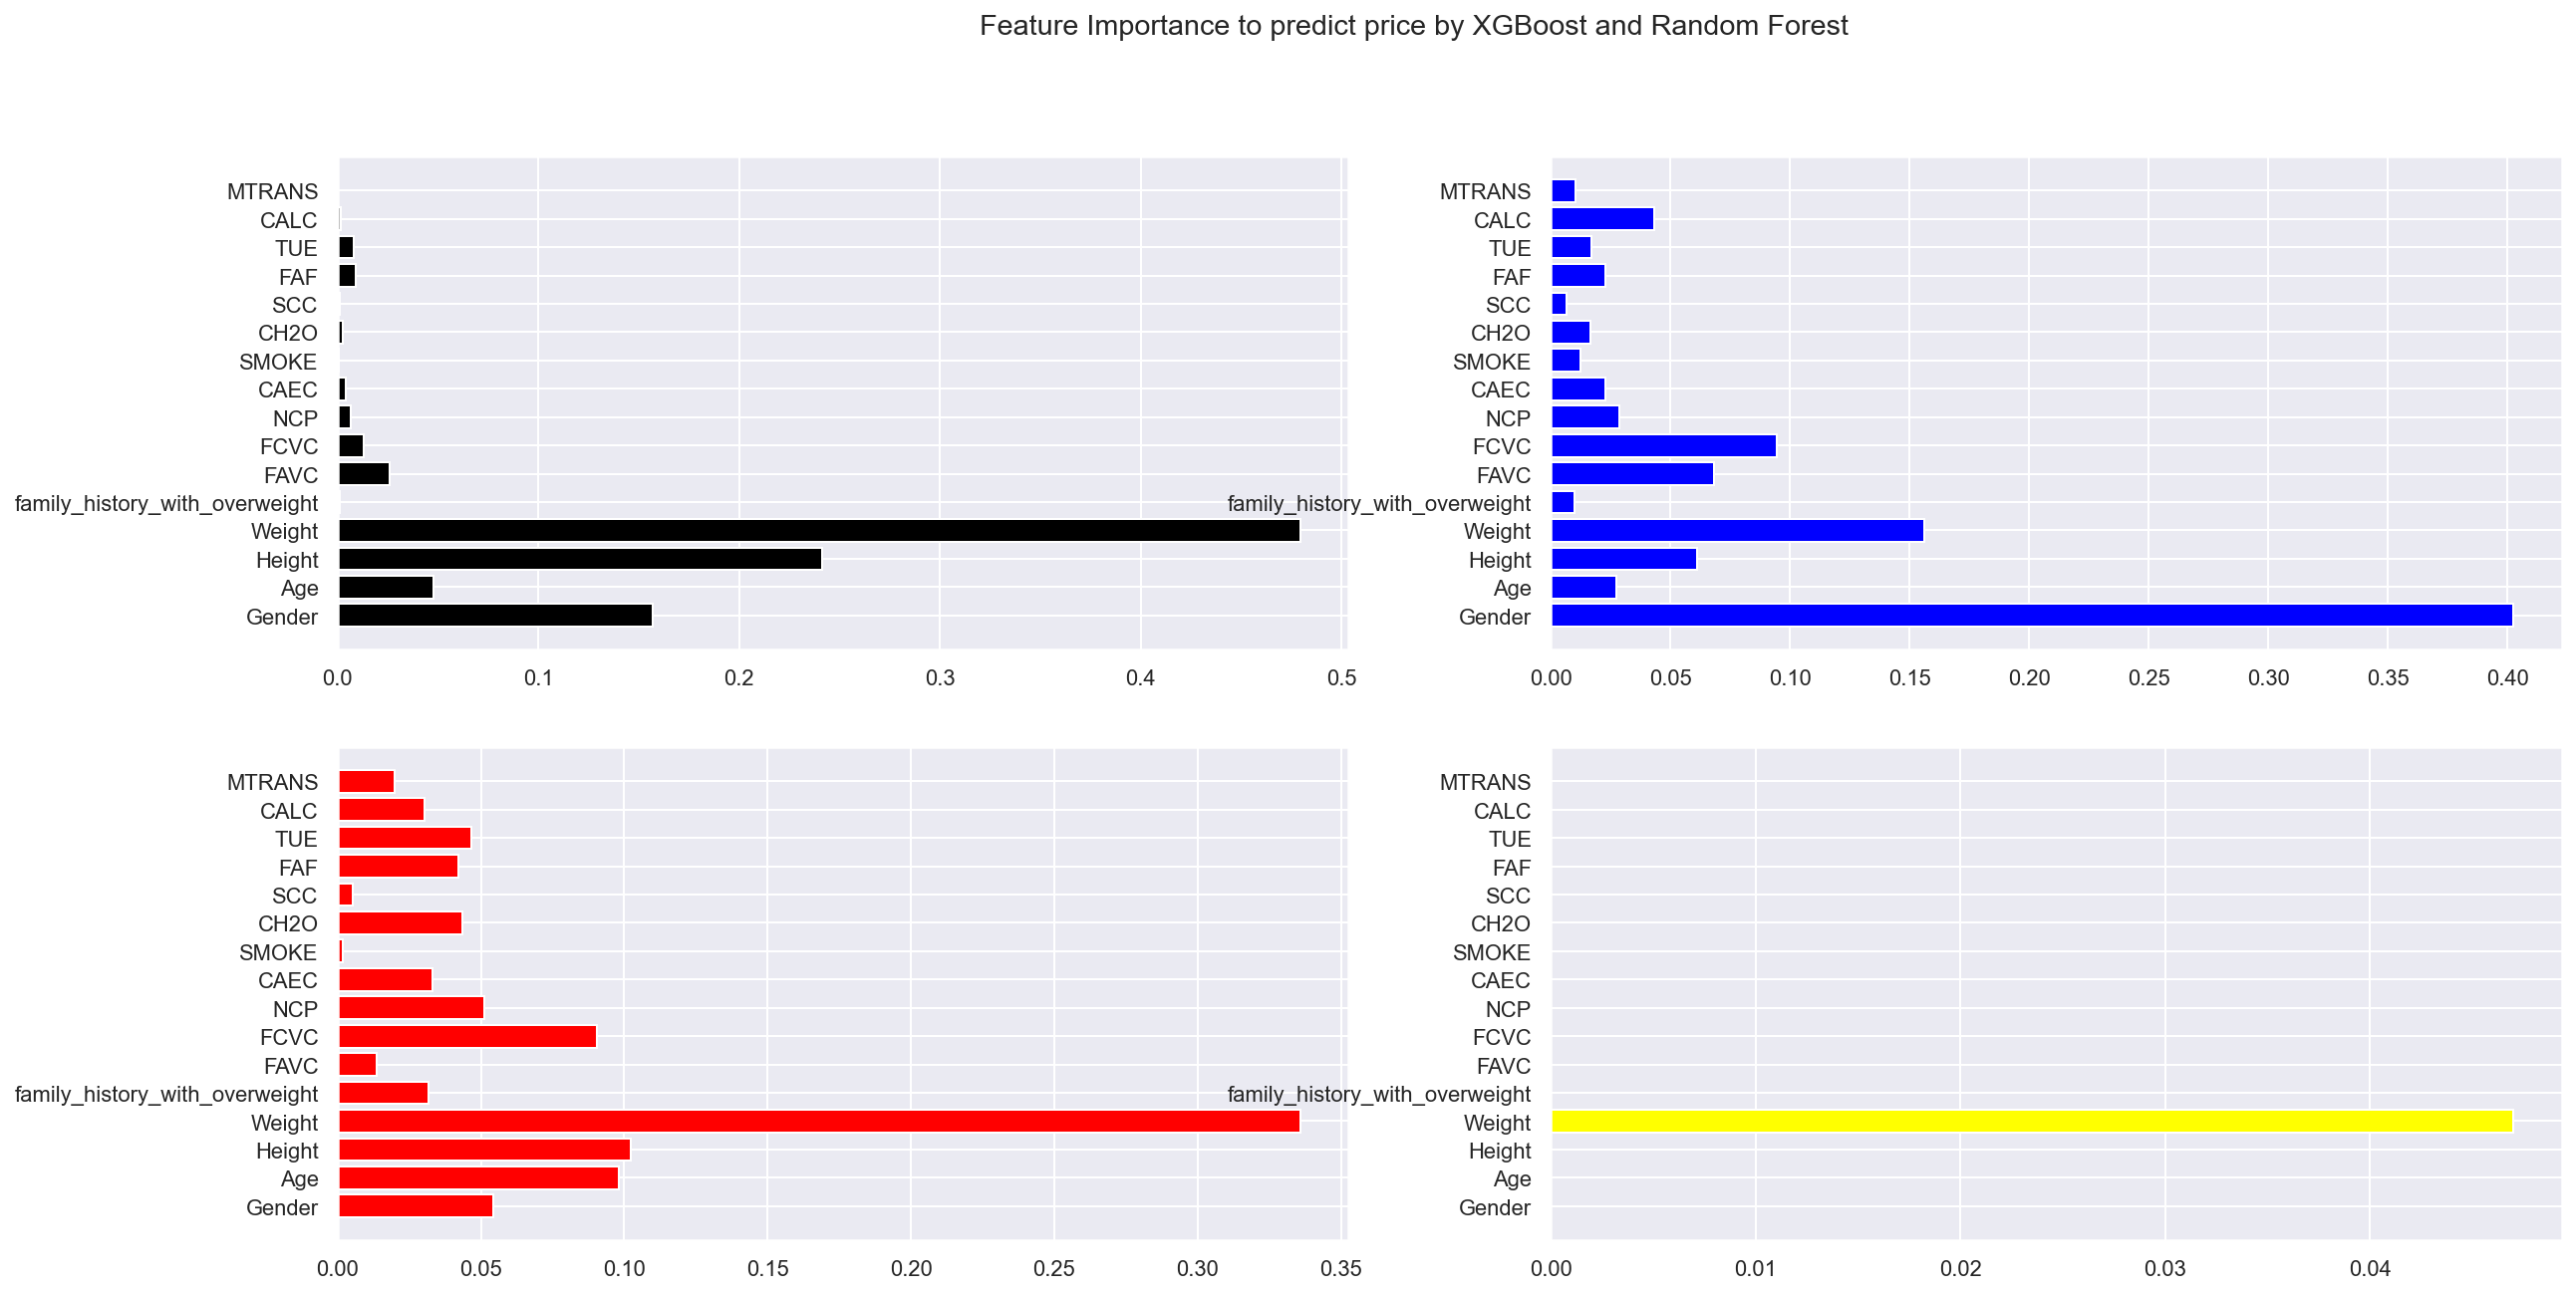

In [34]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
ax[0,0].barh(b,clf.feature_importances_, label='CLF', color='black')
ax[0,1].barh(b,xgb.feature_importances_, label='XGBoost', color='blue')
ax[1,0].barh(b,rf.feature_importances_, label='RF', color='red')
ax[1,1].barh(b,lm_lasso.coef_, label='lm_lasso', color='yellow')

plt.suptitle('Feature Importance to predict price by XGBoost and Random Forest')
# ax[0].set_title('XGBoost')
# ax[1].set_title('Random Forest')
# ax[0].set_xlabel('Feature Importance (%)')
# ax[1].set_xlabel('Feature Importance (%)')
# plt.tight_layout()
plt.show()